# INFO 7374 Machine Learning in Finance
# Garch Model 

## Installing the datareader


## Importing all the requried libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)
from math import sqrt
from sklearn.metrics import mean_squared_error

import scipy.optimize as opt

# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [2]:
start = datetime.datetime(2012, 9, 30)
end = datetime.datetime(2022, 9, 30)
df_TSM = web.DataReader('TSM', 'yahoo', start, end) 
df_AMD = web.DataReader('AMD', 'yahoo', start, end) 
amd = df_AMD
TSM = df_TSM
TSM = TSM.reset_index()
TSM['Date'] = pd.to_datetime(TSM['Date'])
# corresponding csv file is saved in an ouput directory 
#df_pfe.to_csv('data/data.csv')
TSM 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899859
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974702
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012124
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094450
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027092
...,...,...,...,...,...,...,...
2512,2022-09-26,74.190002,72.919998,73.470001,73.010002,13441500.0,73.010002
2513,2022-09-27,74.040001,72.349998,73.510002,73.029999,12430600.0,73.029999
2514,2022-09-28,72.290001,70.699997,71.110001,72.129997,12943600.0,72.129997
2515,2022-09-29,70.680000,68.480003,70.519997,69.279999,16120300.0,69.279999


In [3]:
TSM.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
TSM.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,47.835364,46.859432,47.374394,47.342531,9.271798e+06,43.460971
std,33.932659,33.019317,33.527677,33.449447,4.572748e+06,34.232553
min,15.160000,15.000000,15.080000,15.030000,1.499700e+06,11.248736
25%,22.450001,22.010000,22.230000,22.219999,6.226800e+06,17.766132
50%,36.820000,36.240002,36.549999,36.540001,8.350100e+06,32.411129
75%,56.340000,55.060001,55.619999,55.730000,1.118060e+07,52.667690
max,145.000000,139.419998,141.610001,140.660004,5.202000e+07,138.468277


In [5]:
amd.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,32.272547,30.930370,31.624843,31.608756,5.013729e+07,31.608756
std,38.897513,37.247977,38.114641,38.078345,3.819258e+07,38.078345
min,1.690000,1.610000,1.620000,1.620000,0.000000e+00,1.620000
25%,3.730000,3.600000,3.670000,3.660000,2.059620e+07,3.660000
50%,12.660000,12.130000,12.420000,12.310000,4.222430e+07,12.310000
75%,52.299999,49.900002,51.340000,51.709999,6.789120e+07,51.709999
max,164.460007,156.100006,163.279999,161.910004,3.250584e+08,161.910004


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [6]:
TSM['Typical_Price'] = TSM[['High','Low','Close']].mean(axis=1)
TSM['lrets'] = (np.log(TSM.Close) - np.log(TSM.Close.shift(1))) * 100.
TSM.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899859,15.846666,NaN
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974702,15.973333,0.626964
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012124,15.973333,0.312008
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094450,16.110000,0.683024
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027092,16.136667,-0.558488


In [7]:

amd['lrets'] = (np.log(amd.Close) - np.log(amd.Close.shift(1))) * 100.
amd.head()

,High,Low,Open,Close,Volume,Adj Close,lrets
Date,,,,,,,
2012-10-01,3.41,3.26,3.39,3.28,25050500,3.28,NaN
2012-10-02,3.41,3.17,3.30,3.27,27052700,3.27,-0.305343
2012-10-03,3.29,3.10,3.28,3.12,27800700,3.12,-4.695701
2012-10-04,3.25,3.09,3.17,3.22,23236300,3.22,3.154840
2012-10-05,3.28,3.17,3.24,3.22,11215000,3.22,0.000000


C:\Users\pramo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lrets', ylabel='Density'>

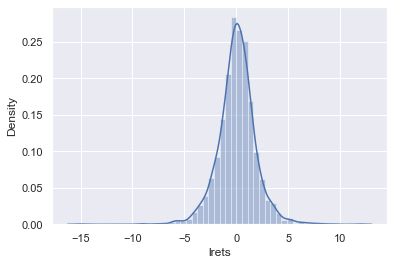

In [8]:
sns.distplot(TSM['lrets'].dropna())

C:\Users\pramo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lrets', ylabel='Density'>

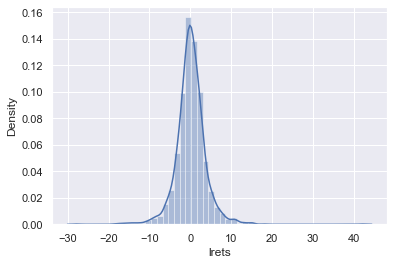

In [9]:
sns.distplot(amd['lrets'].dropna())

In [10]:
def GARCH(Y):
    "Initialize Params:"
    mu = param0[0]
    omega = param0[1]
    alpha = param0[2]
    beta = param0[3]
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T) 
    sigma2 = np.zeros(T)   
    F = np.zeros(T)   
    v = np.zeros(T)   
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+(1/2)*(F[t]/v[t])     
        Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood

In [11]:
def GARCH_Prod(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)  
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.0001
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
    return Y

         Current function value: 2.802905
         Iterations: 0
         Function evaluations: 122
         Gradient evaluations: 22


C:\Users\pramo\AppData\Local\Temp/ipykernel_43944/4071384948.py:5: OptimizeWarning: Unknown solver options: xtol
  param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})


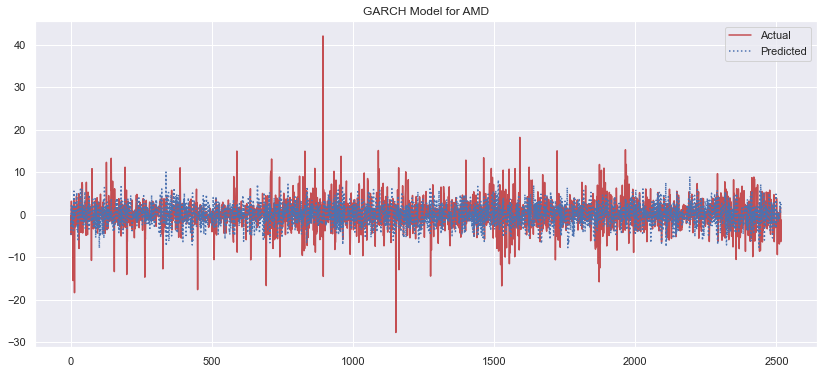

In [14]:
Y = amd['lrets'].dropna()
T=len(Y)

param0=np.array([0.124,1.88,0.2,0.5])
param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})

Y_GARCH=GARCH_Prod(param_star.x,Y[1],T)
timevec=np.linspace(1,T,T)

fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')

plt.legend(loc='upper right')
plt.title("GARCH Model for AMD")
plt.show()

In [15]:
dif_amd = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(Y_GARCH)})
dif_amd

,Actual,Predicted
0,-0.305343,-4.695701
1,-4.695701,0.284033
2,3.154840,2.162327
3,0.000000,-0.266163
4,-0.936043,-2.549299
...,...,...
2511,-2.472934,3.294497
2512,1.303675,1.732162
2513,1.756118,0.280087
2514,-6.371968,2.415462


In [20]:
# from sklearn.metrics import r2_score
# R2_score = r2_score(dif_amd['Actual'],dif_amd['Predicted'], multioutput='variance_weighted')
# # print(R2_score)

         Current function value: 2.540339
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 17


C:\Users\pramo\AppData\Local\Temp/ipykernel_43944/720099429.py:6: OptimizeWarning: Unknown solver options: xtol
  param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})


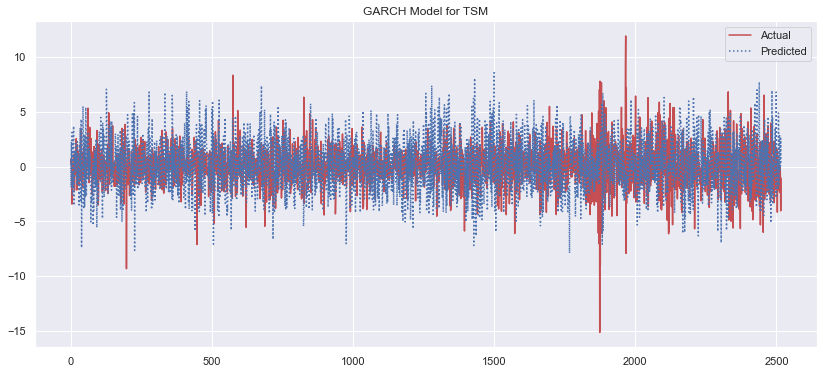

In [21]:
Y = TSM['lrets'].dropna()
T=len(Y)

#Y=np.random.normal(mu,sig,T)
param0=np.array([0.124,1.88,0.2,0.5])
param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH=GARCH_Prod(param_star.x,Y[1],T)
timevec=np.linspace(1,T,T)

fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')

plt.legend(loc='upper right')
plt.title("GARCH Model for TSM")
plt.show()

In [22]:
dif = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(Y_GARCH)})

In [23]:
dif

,Actual,Predicted
0,0.626964,0.626964
1,0.312008,-1.895348
2,0.683024,2.249428
3,-0.558488,-0.189284
4,-3.418054,3.119642
...,...,...
2511,-1.171038,1.554655
2512,0.027385,-0.326581
2513,-1.240029,1.222253
2514,-4.031376,2.566488


In [24]:
dif.head()

,Actual,Predicted
0,0.626964,0.626964
1,0.312008,-1.895348
2,0.683024,2.249428
3,-0.558488,-0.189284
4,-3.418054,3.119642


In [26]:
# rms = sqrt(mean_squared_error(dif['Actual'],dif['Predicted']))
# rms

In [27]:
y_pred = [] * 1000

for i in range(len(dif)+1):
    if i == 0:
        y_pred.append(636.989990)
    else:
        y_pred.append(math.exp(dif['Predicted'][i-1]/100) * y_pred[i-1])

In [29]:

Predicted = pd.DataFrame({'Actual_Close_Price':TSM.Close,
                     'Predicted_Close_Price':list(y_pred),
                         'Date': TSM.Date})
Predicted.set_index('Date')

,Actual_Close_Price,Predicted_Close_Price
Date,,
2012-10-01,15.900000,636.989990
2012-10-02,16.000000,640.996232
2012-10-03,16.049999,628.961533
2012-10-04,16.160000,643.269894
2012-10-05,16.070000,642.053437
...,...,...
2022-09-26,73.010002,103377.852101
2022-09-27,73.029999,103040.790138
2022-09-28,72.129997,104307.937178



### Checking Return Volatility with Actual and Predicted Values¶

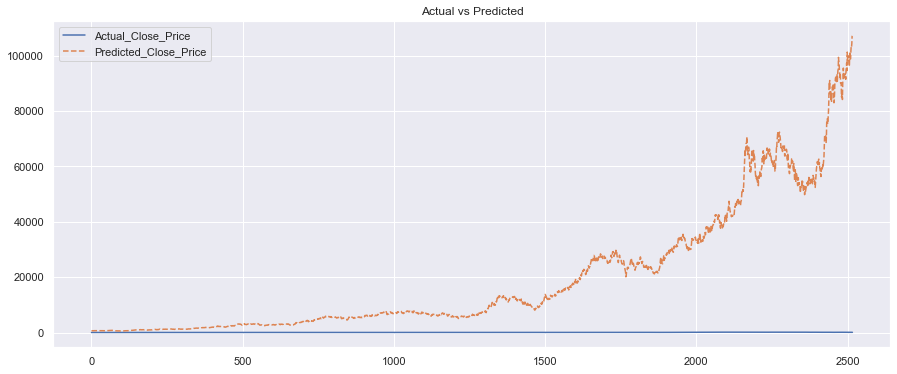

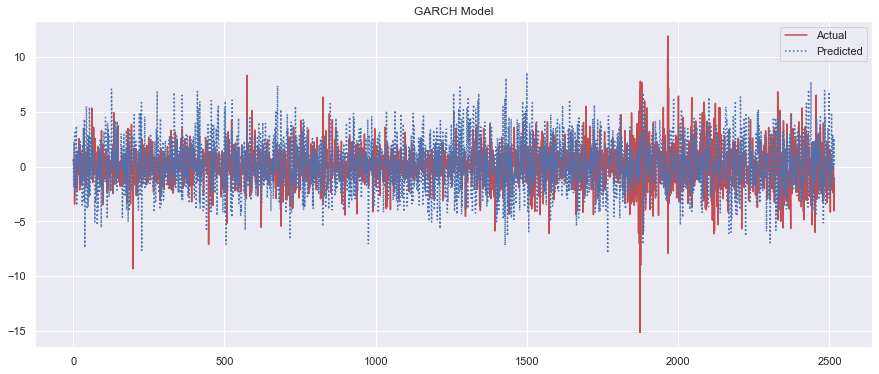

In [30]:
Predicted[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,6), style=['-','--'], 
                                                                    title = 'Actual vs Predicted')
fig= plt.figure(figsize=(15,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("GARCH Model")
plt.show()

In [31]:
Predicted.head()


,Actual_Close_Price,Predicted_Close_Price,Date
0,15.900000,636.989990,2012-10-01
1,16.000000,640.996232,2012-10-02
2,16.049999,628.961533,2012-10-03
3,16.160000,643.269894,2012-10-04
4,16.070000,642.053437,2012-10-05


## Trading Strategy
#### 1.Buy if we have next days predicted_value greater than todays close value and hold if already bought
#### 2.Sell if we have next days predicted_value lesser than todays close value and dont buy until rule 1

In [32]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(Predicted)-1):
    if Predicted['Predicted_Close_Price'][i+1] > Predicted['Actual_Close_Price'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / Predicted['Actual_Close_Price'][i])
            balance = int(amount % Predicted['Actual_Close_Price'][i])
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',Predicted['Actual_Close_Price'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            amount = portfolio + balance
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif Predicted['Predicted_Close_Price'][i+1] < Predicted['Actual_Close_Price'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    print('\n')

Stock: 15.899999618530273 Action: Buy Portfolio: 9985.2 Stocks: 628 Balance_init: 14 total($) 9999.2


Stock: 16.0 Action: Bought--Holding Portfolio: 10048.0 Stocks: 628 Balance_init: 14 total($) 10062.0


Stock: 16.049999237060547 Action: Bought--Holding Portfolio: 10079.4 Stocks: 628 Balance_init: 14 total($) 10093.4


Stock: 16.15999984741211 Action: Bought--Holding Portfolio: 10148.48 Stocks: 628 Balance_init: 14 total($) 10162.48


Stock: 16.06999969482422 Action: Bought--Holding Portfolio: 10091.96 Stocks: 628 Balance_init: 14 total($) 10105.96


Stock: 15.529999732971191 Action: Bought--Holding Portfolio: 9752.84 Stocks: 628 Balance_init: 14 total($) 9766.84


Stock: 15.359999656677246 Action: Bought--Holding Portfolio: 9646.08 Stocks: 628 Balance_init: 14 total($) 9660.08


Stock: 15.119999885559082 Action: Bought--Holding Portfolio: 9495.36 Stocks: 628 Balance_init: 14 total($) 9509.36


Stock: 15.029999732971191 Action: Bought--Holding Portfolio: 9438.84 Stocks: 628 Balance_i

Stock: 18.34000015258789 Action: Bought--Holding Portfolio: 11517.52 Stocks: 628 Balance_init: 14 total($) 11531.52


Stock: 18.079999923706055 Action: Bought--Holding Portfolio: 11354.24 Stocks: 628 Balance_init: 14 total($) 11368.24


Stock: 18.270000457763672 Action: Bought--Holding Portfolio: 11473.56 Stocks: 628 Balance_init: 14 total($) 11487.56


Stock: 18.1299991607666 Action: Bought--Holding Portfolio: 11385.64 Stocks: 628 Balance_init: 14 total($) 11399.64


Stock: 18.010000228881836 Action: Bought--Holding Portfolio: 11310.28 Stocks: 628 Balance_init: 14 total($) 11324.28


Stock: 17.729999542236328 Action: Bought--Holding Portfolio: 11134.44 Stocks: 628 Balance_init: 14 total($) 11148.44


Stock: 17.809999465942383 Action: Bought--Holding Portfolio: 11184.68 Stocks: 628 Balance_init: 14 total($) 11198.68


Stock: 17.610000610351562 Action: Bought--Holding Portfolio: 11059.08 Stocks: 628 Balance_init: 14 total($) 11073.08


Stock: 17.5 Action: Bought--Holding Portfolio: 1099



Stock: 20.829999923706055 Action: Bought--Holding Portfolio: 13081.24 Stocks: 628 Balance_init: 14 total($) 13095.24


Stock: 20.81999969482422 Action: Bought--Holding Portfolio: 13074.96 Stocks: 628 Balance_init: 14 total($) 13088.96


Stock: 20.3799991607666 Action: Bought--Holding Portfolio: 12798.64 Stocks: 628 Balance_init: 14 total($) 12812.64


Stock: 20.600000381469727 Action: Bought--Holding Portfolio: 12936.8 Stocks: 628 Balance_init: 14 total($) 12950.8


Stock: 20.469999313354492 Action: Bought--Holding Portfolio: 12855.16 Stocks: 628 Balance_init: 14 total($) 12869.16


Stock: 19.440000534057617 Action: Bought--Holding Portfolio: 12208.32 Stocks: 628 Balance_init: 14 total($) 12222.32


Stock: 19.670000076293945 Action: Bought--Holding Portfolio: 12352.76 Stocks: 628 Balance_init: 14 total($) 12366.76


Stock: 20.139999389648438 Action: Bought--Holding Portfolio: 12647.92 Stocks: 628 Balance_init: 14 total($) 12661.92


Stock: 20.06999969482422 Action: Bought--Holding Po

Stock: 22.81999969482422 Action: Bought--Holding Portfolio: 14330.96 Stocks: 628 Balance_init: 14 total($) 14344.96


Stock: 22.959999084472656 Action: Bought--Holding Portfolio: 14418.88 Stocks: 628 Balance_init: 14 total($) 14432.88


Stock: 22.510000228881836 Action: Bought--Holding Portfolio: 14136.28 Stocks: 628 Balance_init: 14 total($) 14150.28


Stock: 22.579999923706055 Action: Bought--Holding Portfolio: 14180.24 Stocks: 628 Balance_init: 14 total($) 14194.24


Stock: 22.239999771118164 Action: Bought--Holding Portfolio: 13966.72 Stocks: 628 Balance_init: 14 total($) 13980.72


Stock: 21.889999389648438 Action: Bought--Holding Portfolio: 13746.92 Stocks: 628 Balance_init: 14 total($) 13760.92


Stock: 22.350000381469727 Action: Bought--Holding Portfolio: 14035.8 Stocks: 628 Balance_init: 14 total($) 14049.8


Stock: 22.520000457763672 Action: Bought--Holding Portfolio: 14142.56 Stocks: 628 Balance_init: 14 total($) 14156.56


Stock: 22.520000457763672 Action: Bought--Holding P

Stock: 30.709999084472656 Action: Bought--Holding Portfolio: 19285.88 Stocks: 628 Balance_init: 14 total($) 19299.88


Stock: 30.389999389648438 Action: Bought--Holding Portfolio: 19084.92 Stocks: 628 Balance_init: 14 total($) 19098.92


Stock: 30.280000686645508 Action: Bought--Holding Portfolio: 19015.84 Stocks: 628 Balance_init: 14 total($) 19029.84


Stock: 30.239999771118164 Action: Bought--Holding Portfolio: 18990.72 Stocks: 628 Balance_init: 14 total($) 19004.72


Stock: 31.350000381469727 Action: Bought--Holding Portfolio: 19687.8 Stocks: 628 Balance_init: 14 total($) 19701.8


Stock: 31.34000015258789 Action: Bought--Holding Portfolio: 19681.52 Stocks: 628 Balance_init: 14 total($) 19695.52


Stock: 30.59000015258789 Action: Bought--Holding Portfolio: 19210.52 Stocks: 628 Balance_init: 14 total($) 19224.52


Stock: 29.440000534057617 Action: Bought--Holding Portfolio: 18488.32 Stocks: 628 Balance_init: 14 total($) 18502.32


Stock: 29.93000030517578 Action: Bought--Holding Por

Stock: 42.06999969482422 Action: Bought--Holding Portfolio: 26419.96 Stocks: 628 Balance_init: 14 total($) 26433.96


Stock: 42.209999084472656 Action: Bought--Holding Portfolio: 26507.88 Stocks: 628 Balance_init: 14 total($) 26521.88


Stock: 42.58000183105469 Action: Bought--Holding Portfolio: 26740.24 Stocks: 628 Balance_init: 14 total($) 26754.24


Stock: 42.40999984741211 Action: Bought--Holding Portfolio: 26633.48 Stocks: 628 Balance_init: 14 total($) 26647.48


Stock: 42.9900016784668 Action: Bought--Holding Portfolio: 26997.72 Stocks: 628 Balance_init: 14 total($) 27011.72


Stock: 41.09000015258789 Action: Bought--Holding Portfolio: 25804.52 Stocks: 628 Balance_init: 14 total($) 25818.52


Stock: 40.93000030517578 Action: Bought--Holding Portfolio: 25704.04 Stocks: 628 Balance_init: 14 total($) 25718.04


Stock: 39.40999984741211 Action: Bought--Holding Portfolio: 24749.48 Stocks: 628 Balance_init: 14 total($) 24763.48


Stock: 39.599998474121094 Action: Bought--Holding Portfo

Stock: 36.86000061035156 Action: Bought--Holding Portfolio: 23148.08 Stocks: 628 Balance_init: 14 total($) 23162.08


Stock: 36.52000045776367 Action: Bought--Holding Portfolio: 22934.56 Stocks: 628 Balance_init: 14 total($) 22948.56


Stock: 36.43000030517578 Action: Bought--Holding Portfolio: 22878.04 Stocks: 628 Balance_init: 14 total($) 22892.04


Stock: 36.70000076293945 Action: Bought--Holding Portfolio: 23047.6 Stocks: 628 Balance_init: 14 total($) 23061.6


Stock: 37.380001068115234 Action: Bought--Holding Portfolio: 23474.64 Stocks: 628 Balance_init: 14 total($) 23488.64


Stock: 37.33000183105469 Action: Bought--Holding Portfolio: 23443.24 Stocks: 628 Balance_init: 14 total($) 23457.24


Stock: 36.529998779296875 Action: Bought--Holding Portfolio: 22940.84 Stocks: 628 Balance_init: 14 total($) 22954.84


Stock: 36.220001220703125 Action: Bought--Holding Portfolio: 22746.16 Stocks: 628 Balance_init: 14 total($) 22760.16


Stock: 36.7599983215332 Action: Bought--Holding Portfol

Stock: 53.09000015258789 Action: Bought--Holding Portfolio: 33340.52 Stocks: 628 Balance_init: 14 total($) 33354.52


Stock: 52.97999954223633 Action: Bought--Holding Portfolio: 33271.44 Stocks: 628 Balance_init: 14 total($) 33285.44


Stock: 52.779998779296875 Action: Bought--Holding Portfolio: 33145.84 Stocks: 628 Balance_init: 14 total($) 33159.84


Stock: 53.18000030517578 Action: Bought--Holding Portfolio: 33397.04 Stocks: 628 Balance_init: 14 total($) 33411.04


Stock: 54.400001525878906 Action: Bought--Holding Portfolio: 34163.2 Stocks: 628 Balance_init: 14 total($) 34177.2


Stock: 54.939998626708984 Action: Bought--Holding Portfolio: 34502.32 Stocks: 628 Balance_init: 14 total($) 34516.32


Stock: 54.459999084472656 Action: Bought--Holding Portfolio: 34200.88 Stocks: 628 Balance_init: 14 total($) 34214.88


Stock: 54.52000045776367 Action: Bought--Holding Portfolio: 34238.56 Stocks: 628 Balance_init: 14 total($) 34252.56


Stock: 55.900001525878906 Action: Bought--Holding Port

Stock: 105.63999938964844 Action: Bought--Holding Portfolio: 66341.92 Stocks: 628 Balance_init: 14 total($) 66355.92


Stock: 104.41999816894531 Action: Bought--Holding Portfolio: 65575.76 Stocks: 628 Balance_init: 14 total($) 65589.76


Stock: 104.2300033569336 Action: Bought--Holding Portfolio: 65456.44 Stocks: 628 Balance_init: 14 total($) 65470.44


Stock: 104.02999877929688 Action: Bought--Holding Portfolio: 65330.84 Stocks: 628 Balance_init: 14 total($) 65344.84


Stock: 103.55999755859375 Action: Bought--Holding Portfolio: 65035.68 Stocks: 628 Balance_init: 14 total($) 65049.68


Stock: 105.08999633789062 Action: Bought--Holding Portfolio: 65996.52 Stocks: 628 Balance_init: 14 total($) 66010.52


Stock: 105.19999694824219 Action: Bought--Holding Portfolio: 66065.6 Stocks: 628 Balance_init: 14 total($) 66079.6


Stock: 103.9000015258789 Action: Bought--Holding Portfolio: 65249.2 Stocks: 628 Balance_init: 14 total($) 65263.2


Stock: 104.27999877929688 Action: Bought--Holding Port

Stock: 114.01000213623047 Action: Bought--Holding Portfolio: 71598.28 Stocks: 628 Balance_init: 14 total($) 71612.28


Stock: 117.79000091552734 Action: Bought--Holding Portfolio: 73972.12 Stocks: 628 Balance_init: 14 total($) 73986.12


Stock: 117.80000305175781 Action: Bought--Holding Portfolio: 73978.4 Stocks: 628 Balance_init: 14 total($) 73992.4


Stock: 120.91000366210938 Action: Bought--Holding Portfolio: 75931.48 Stocks: 628 Balance_init: 14 total($) 75945.48


Stock: 121.77999877929688 Action: Bought--Holding Portfolio: 76477.84 Stocks: 628 Balance_init: 14 total($) 76491.84


Stock: 118.19999694824219 Action: Bought--Holding Portfolio: 74229.6 Stocks: 628 Balance_init: 14 total($) 74243.6


Stock: 118.19000244140625 Action: Bought--Holding Portfolio: 74223.32 Stocks: 628 Balance_init: 14 total($) 74237.32


Stock: 118.69000244140625 Action: Bought--Holding Portfolio: 74537.32 Stocks: 628 Balance_init: 14 total($) 74551.32


Stock: 118.12000274658203 Action: Bought--Holding Po



Stock: 83.3499984741211 Action: Bought--Holding Portfolio: 52343.8 Stocks: 628 Balance_init: 14 total($) 52357.8


Stock: 81.63999938964844 Action: Bought--Holding Portfolio: 51269.92 Stocks: 628 Balance_init: 14 total($) 51283.92


Stock: 80.9000015258789 Action: Bought--Holding Portfolio: 50805.2 Stocks: 628 Balance_init: 14 total($) 50819.2


Stock: 80.02999877929688 Action: Bought--Holding Portfolio: 50258.84 Stocks: 628 Balance_init: 14 total($) 50272.84


Stock: 79.94999694824219 Action: Bought--Holding Portfolio: 50208.6 Stocks: 628 Balance_init: 14 total($) 50222.6


Stock: 80.23999786376953 Action: Bought--Holding Portfolio: 50390.72 Stocks: 628 Balance_init: 14 total($) 50404.72


Stock: 81.52999877929688 Action: Bought--Holding Portfolio: 51200.84 Stocks: 628 Balance_init: 14 total($) 51214.84


Stock: 82.1500015258789 Action: Bought--Holding Portfolio: 51590.2 Stocks: 628 Balance_init: 14 total($) 51604.2


Stock: 78.80999755859375 Action: Bought--Holding Portfolio: 49492

### Created a dataframe with all the information


In [33]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':TSM.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': TSM.Date[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
1,16.000000,640.996232,2012-10-02,Buy,628,9985.19976,9999.0
2,16.049999,628.961533,2012-10-03,Bought--Holding,628,10048.00000,10062.0
3,16.160000,643.269894,2012-10-04,Bought--Holding,628,10079.39952,10093.0
4,16.070000,642.053437,2012-10-05,Bought--Holding,628,10148.47990,10162.0
5,15.530000,662.398912,2012-10-08,Bought--Holding,628,10091.95981,10106.0


### Profit Made with this Strategy


<AxesSubplot:title={'center':'Total Amount'}>

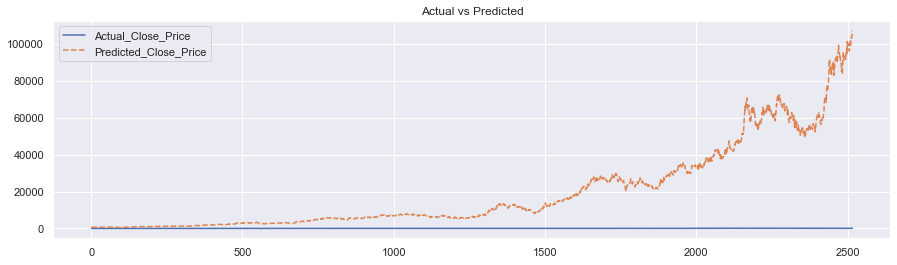

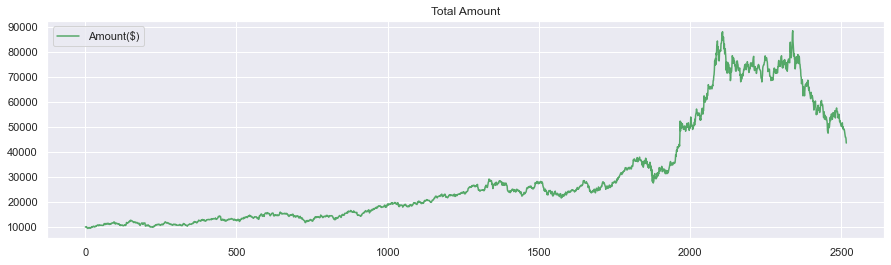

In [34]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [35]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 43522.0 $
Profit_Percent: 435.21999999999997 %


In [36]:
# rms = sqrt(mean_squared_error(Strategy_Result['Actual_Close_Price']
#                               , Strategy_Result['Predicted_Close_Price']))
# rms

30545.420519358013